Problem Statement.


Use Twitter data to predict seniment analysis 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.grid_search import GridSearchCV
import seaborn as sns


tweets_data = []
tweets_file = open('twitter_data.txt', 'r+')
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue       

/Users/work/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/work/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
tweets = pd.DataFrame(tweets_data)

In [5]:
tweets.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,filter_level,...,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,timestamp_ms,truncated,user
0,NaN,None,Sun Oct 30 22:45:33 +0000 2016,NaN,"{u'user_mentions': [{u'id': 20818801, u'indice...",NaN,NaN,0.0,False,low,...,NaN,NaN,0.0,False,"{u'contributors': None, u'truncated': False, u...","<a href=""http://twitter.com/download/android"" ...",RT @dailykos: Washington Post's account of Tru...,1477867533428,False,"{u'follow_request_sent': None, u'profile_use_b..."
1,NaN,None,Sun Oct 30 22:45:33 +0000 2016,NaN,"{u'user_mentions': [{u'id': 159311024, u'indic...",NaN,NaN,0.0,False,low,...,NaN,NaN,0.0,False,"{u'contributors': None, u'truncated': False, u...","<a href=""http://twitter.com/download/iphone"" r...",RT @EmilyBett: Trump might be president and yo...,1477867533252,False,"{u'follow_request_sent': None, u'profile_use_b..."
2,NaN,None,Sun Oct 30 22:45:33 +0000 2016,NaN,"{u'user_mentions': [], u'symbols': [], u'hasht...",NaN,NaN,0.0,False,low,...,NaN,NaN,0.0,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Texas Early Voting up 50% — Official: Untapped...,1477867533326,False,"{u'follow_request_sent': None, u'profile_use_b..."
3,NaN,None,Sun Oct 30 22:45:33 +0000 2016,NaN,"{u'user_mentions': [{u'id': 28785486, u'indice...",NaN,NaN,0.0,False,low,...,NaN,NaN,0.0,False,"{u'contributors': None, u'truncated': True, u'...","<a href=""http://twitter.com/download/android"" ...",RT @ABC: JUST IN: FBI obtains warrant needed t...,1477867533405,False,"{u'follow_request_sent': None, u'profile_use_b..."
4,NaN,None,Sun Oct 30 22:45:33 +0000 2016,NaN,"{u'user_mentions': [{u'id': 75081190, u'indice...",NaN,NaN,0.0,False,low,...,7.926930e+17,792693016699949056,0.0,False,"{u'contributors': None, u'truncated': False, u...","<a href=""http://twitter.com/download/android"" ...",RT @youlivethrice: Amy Schumer sucks https://t...,1477867533372,False,"{u'follow_request_sent': None, u'profile_use_b..."


In [6]:
#drop useless columns
drop_columns = ['created_at','entities', 'contributors','display_text_range','coordinates','extended_entities','geo', 'place',
                'quoted_status','quoted_status_id','possibly_sensitive',
                'in_reply_to_screen_name', 'in_reply_to_user_id_str', 'extended_tweet','favorite_count','favorited','filter_level','id_str','id','in_reply_to_status_id',
                'in_reply_to_status_id_str','in_reply_to_user_id','limit','quoted_status_id_str','retweet_count', 'truncated', 'retweeted_status', 'timestamp_ms']

tweets.drop(drop_columns, axis=1, inplace=True)

## Cleaning the data

In [7]:
### Clean up source column
source = []
for i in tweets['source']:
    if type(i) == float:
        source += [i]
    else:
        source += [i.split('">')[1].split('<')[0]]
tweets['source'] = source

In [8]:
##Expand User data into new columnns. Here you can see the key value pairs that are contain in the users column

favourites_count = []
followers_count = []
following = []
friends_count = []
lang = []
location = []
name = []
screen_name = []
time_zone = []
verified = []
statuses_count = []

for i in tweets['user']:   
    if type(i) == float:
        favourites_count += [i]
        followers_count += [i]
        following += [i]
        friends_count += [i]
        lang += [i]
        location += [i]
        name += [i]
        screen_name += [i]
        time_zone += [i]
        verified += [i]
        statuses_count += [i]
    else:
        favourites_count += [i['followers_count']]
        followers_count += [i['followers_count']]
        following += [i['following']]
        friends_count += [i['friends_count']]
        lang += [i['lang']]
        location += [i['location']]
        name += [i['name']]
        screen_name += [i['screen_name']]
        time_zone += [i['time_zone']]
        verified += [i['verified']]
        statuses_count += [i['statuses_count']]
    
    
tweets['favourites_count'] = favourites_count
tweets['followers_count'] = followers_count
tweets['following'] = following
tweets['friends_count'] = friends_count
tweets['lang'] = lang
tweets['location'] = location
tweets['name'] = name
tweets['screen_name'] = screen_name
tweets['time_zone'] = time_zone
tweets['verified'] = verified
tweets['statuses_count'] = statuses_count


In [9]:
tweets.dropna(axis=1, how='all', inplace=True)
tweets.dropna(axis=0, how='any', inplace=True)
tweets.shape

(7786, 15)

In [11]:
##Create sentiment analysis on text using Text Blob
from textblob import TextBlob
## Text blob uses a lexical analysis to estimate polarity and subjectivity
polarity = []
subjectivity = []
for tweet in tweets['text']:
        analysis = TextBlob(tweet)
        polarity += [analysis.sentiment.polarity]
        subjectivity += [analysis.sentiment.subjectivity]
        
tweets['polarity'] = polarity
tweets['subjectivity'] = subjectivity

In [12]:
polarity_cat = []
for i in tweets['polarity']:
    if i < 0.25:
        polarity_cat += ["negative"]
    elif i > 0.25 and i < 0.5:
        polarity_cat += ["somewhat negative"]
    elif i > 0.5 and i < 0.75:
        polarity_cat += ["somewhat positive"]
    else:
        polarity_cat += ["positive"]
        
tweets['polarity_cat']  = polarity_cat

In [13]:
subjectivity_cat = []
for i in tweets['subjectivity']:
    if i < 0.25:
        subjectivity_cat += ["false"]
    elif i > 0.25 and i < 0.5:
        subjectivity_cat += ["somewhat false"]
    elif i > 0.5 and i < 0.75:
        subjectivity_cat += ["somewhat true"]
    else:
        subjectivity_cat += ["true"]
        
tweets['subjectivity_cat']  = subjectivity_cat

In [38]:
tweets['polarity_cat'].value_counts()

negative             4527
positive              428
somewhat negative     351
somewhat positive     109
Name: polarity_cat, dtype: int64

In [15]:
tweets = tweets[tweets['lang'].isin(tweets['lang'].value_counts()[:1].index.values)]
tweets = tweets[tweets['source'].isin(tweets['source'].value_counts()[:10].index.values)]
tweets = tweets[tweets['time_zone'].isin(tweets['time_zone'].value_counts()[:5].index.values)]

In [16]:
tweets.columns.values

array([u'is_quote_status', u'lang', u'retweeted', u'source', u'text',
       u'user', 'favourites_count', 'followers_count', 'friends_count',
       'location', 'name', 'screen_name', 'time_zone', 'verified',
       'statuses_count', 'polarity', 'subjectivity', 'polarity_cat',
       'subjectivity_cat'], dtype=object)

## Exploritory Data Analysis

In [17]:
# plot
sns.factorplot('verified','subjectivity_cat', data=tweets, size=4,aspect=3)

sns.countplot(x='verified', data=tweets)
sns.countplot(x='subjectivity_cat', hue="verified", data=tweets)


sns.barplot(x='verified', y='subjectivity_cat', data=tweets)

In [ ]:
#pivot table on catigorical lables

# tweets['verified'].value_counts()

# sums = pd.DataFrame()
# sums['count'] = tweets['verified'].value_counts()
# sums['count'] = tweets['subjectivity_cat'].value_counts()
# sums['count'] = tweets['polarity_cat'].value_counts()
# sums['count'] = tweets['time_zone'].value_counts()
# sums['count'] = tweets['source'].value_counts()

In [ ]:
## factor plots
#sns.factorplot(verified)

In [18]:
## create dummy variables
dummies = pd.get_dummies(tweets[['verified','subjectivity_cat','polarity_cat','time_zone','source']])
tweets = tweets.join(dummies)

In [19]:
print tweets.corr()

                                       favourites_count  followers_count  \
favourites_count                               1.000000         1.000000   
followers_count                                1.000000         1.000000   
friends_count                                  0.194280         0.194280   
statuses_count                                 0.054766         0.054766   
polarity                                       0.000772         0.000772   
subjectivity                                  -0.020007        -0.020007   
verified_False                                -0.217757        -0.217757   
verified_True                                  0.217757         0.217757   
subjectivity_cat_false                         0.014556         0.014556   
subjectivity_cat_somewhat false                0.003699         0.003699   
subjectivity_cat_somewhat true                -0.009294        -0.009294   
subjectivity_cat_true                         -0.013204        -0.013204   
polarity_cat

## Building a model

#### Stats Model Log Reg

In [20]:
X = tweets[['time_zone_Pacific Time (US & Canada)', 'source_twitterfeed']]
Y = tweets['polarity_cat_positive']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [22]:
import statsmodels.api as sm
### specify the model
mdl = sm.MNLogit(X_train, y_train)
mdl_fit = mdl.fit()


         Current function value: 0.202518
         Iterations: 35


/Users/work/anaconda/lib/python2.7/site-packages/statsmodels/discrete/discrete_model.py:580: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  start_params = np.zeros((self.K * (self.J-1)))
/Users/work/anaconda/lib/python2.7/site-packages/statsmodels/discrete/discrete_model.py:1840: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  params = params.reshape(self.K, -1, order='F')
/Users/work/anaconda/lib/python2.7/site-packages/statsmodels/discrete/discrete_model.py:1756: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  params = params.reshape(self.K, -1, order='F')
/Users/work/anaconda/lib/python2.7/site-packages/statsmodels/discrete/discrete_model.py:1697: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  params = params.resh

In [23]:
mdl_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                 3628
Model:                        MNLogit   Df Residuals:                     3627
Method:                           MLE   Df Model:                            0
Date:                Tue, 01 Nov 2016   Pseudo R-squ.:                  -7.525
Time:                        15:44:37   Log-Likelihood:                -734.74
converged:                      False   LL-Null:                       -86.186
                                        LLR p-value:                       nan
=========================================================================================
 y=source_twitterfeed       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
polarity_cat_positive   -22.6903   5108.002     -0.004      0.996        -1e+04  9988.810
=========================================================================================
"""

In [26]:
fitted = mdl_fit.predict(y_test)

In [27]:
print(mdl_fit.aic)
print(mdl_fit.bic)

1471.47202281
1477.66845962


#### SKLearn Log Reg

In [28]:
logreg = LogisticRegression()
C_values =  [0.0001, 0.001, 0.01, 0.1, 0.5 , 0.75, 1.0, 2.5, 5.0, 10.0, 100.0, 1000.0]
penalties = ['l1','l2']

gs = GridSearchCV(logreg, {'penalty': penalties, 'C': C_values}, verbose=True , scoring = 'f1_micro')
gs.fit(X_train,y_train)
gs.best_params_

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.7s finished


{'C': 0.0001, 'penalty': 'l1'}

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [30]:
# use this parameter to .fit, .predict, and print a classification_report for our X and Y
gs_logreg = LogisticRegression(C=0.0001, penalty='l1', solver='liblinear')
gs_logreg.fit(X_train, y_train)
Y_ = gs_logreg.predict(X_train)
print(classification_report(y_train, Y_))

             precision    recall  f1-score   support

        0.0       0.92      1.00      0.96      3354
        1.0       0.00      0.00      0.00       274

avg / total       0.85      0.92      0.89      3628



/Users/work/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [33]:
# generic curve plotting function
def auc_plotting_function(rate1, rate2, rate1_name, rate2_name, curve_name):
    AUC = auc(rate1, rate2)
    # Plot of a ROC curve for class 1 (has_cancer)
    plt.figure(figsize=[5,3.5])
    plt.plot(rate1, rate2, label=curve_name + ' (area = %0.2f)' % AUC, linewidth=4)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel(rate1_name, fontsize=18)
    plt.ylabel(rate2_name, fontsize=18)
    plt.title(curve_name + ' for house price > 200,000', fontsize=18)
    plt.legend(loc="lower right")
    plt.show()

# plot receiving operator characteristic curve
def plot_roc(y_true, y_score):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc_plotting_function(fpr, tpr, 'False Positive Rate', 'True Positive Rate', 'ROC')

In [34]:
confusion_matrix(y_train, Y_)

array([[3354,    0],
       [ 274,    0]])

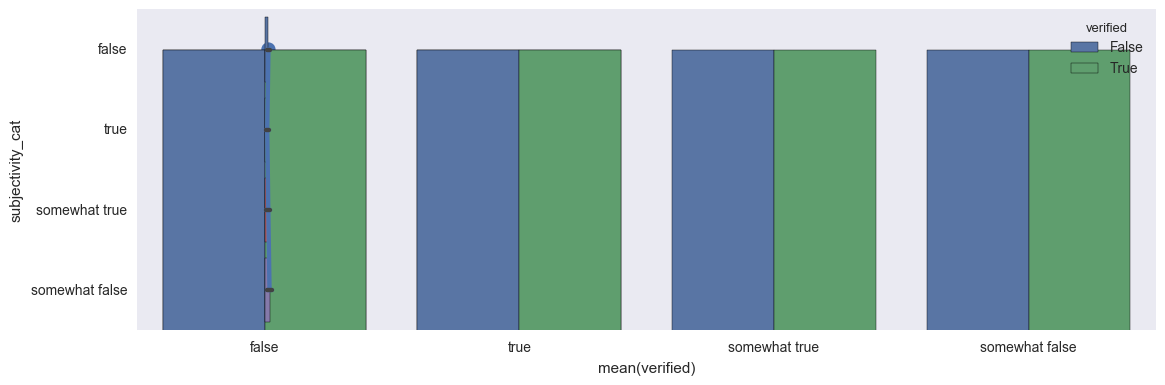

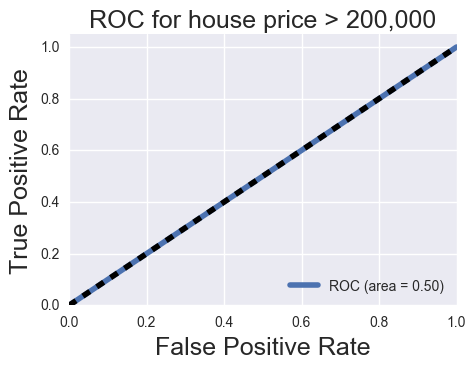

In [35]:
Y_score = gs_logreg.decision_function(X_test)
plot_roc(y_test, Y_score)

In [36]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
knn.score(X_train, y_train)

NameError: name 'KNeighborsClassifier' is not defined